<a href="https://colab.research.google.com/github/sherlock216/20251R0136COSE47101/blob/main/GMM_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilistic Clustering is different from K-Means clustering. It assigns a probability to each data point indicating the likelihood of belonging to each cluster. GMM(Gaussian Mixture Model) is a common probabilistic clustering model.

It assumes a mixture of Gaussian distributions, and it has E-Step and M-Step.
E-Step: Calculate the probability that each data point belongs to each other, based on the current parameters.
M-Step: Update the parameters of each Gaussian distribution to maximize the likelihood of the data given the model.

# 1. Preparing the dataset for clustering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import glob
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# Í≤ΩÎ°úÏóê ÏûàÎäî Î™®Îì† github_profiles*.csv ÌååÏùºÏùÑ Ï∞æÏùå
file_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/COSE471/test/results/github_profiles*.csv')

# Ïó¨Îü¨ ÌååÏùºÏùÑ ÏùΩÏñ¥ÏÑú ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_list = [pd.read_csv(fp, index_col=False).fillna(0) for fp in file_paths]
df_combined = pd.concat(df_list, ignore_index=True)

print(f"Ï¥ù {len(df_combined)}Í∞úÏùò ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")

Ï¥ù 2446Í∞úÏùò ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å


In [4]:
print(len(df_list))

14


In [6]:
# ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥ Ïª¨ÎüºÎßå ÏÑ†ÌÉù
language_columns = df_combined.columns[1:]  # Ï≤´ Î≤àÏß∏ Ïª¨Îüº(Ïú†Ï†Ä ID) Ï†úÏô∏
X = df_combined[language_columns].values
X

array([[0.  , 0.  , 0.33, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.  , ..., 0.  , 0.06, 0.  ],
       ...,
       [0.  , 0.04, 0.02, ..., 0.  , 0.  , 0.21],
       [0.  , 0.  , 0.67, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [7]:
# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. What if we do PCA for displaying with graphs?

In [8]:
# PCAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 2Ï∞®ÏõêÏúºÎ°ú Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# EM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
n_components = 4  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(X_pca)

In [10]:
# 5. 2D Í≥µÍ∞Ñ Í∑∏Î¶¨Îìú ÏÉùÏÑ±
x = np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 200)
y = np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 200)
X_grid, Y_grid = np.meshgrid(x, y)
XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T

In [11]:
# Predict cluster each data point belongs to
Z = gmm.predict_proba(XX)

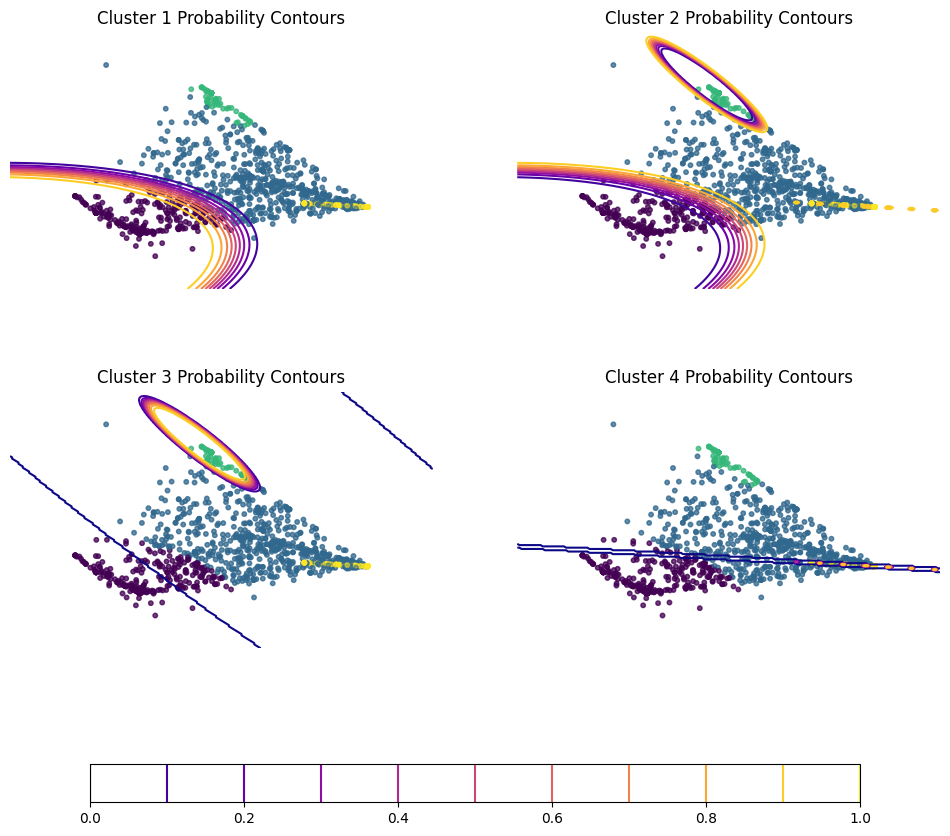

In [12]:
# 7. ÏãúÍ∞ÅÌôî (ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌôïÎ•† Ïª®Ìà¨Ïñ¥)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i in range(4):
    ax = axes[i // 2, i % 2]
    Z_i = Z[:, i].reshape(X_grid.shape)

    contour = ax.contour(X_grid, Y_grid, Z_i, levels=10, cmap='plasma')
    ax.set_title(f"Cluster {i+1} Probability Contours")
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10, alpha=0.5)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_axis_off()

plt.subplots_adjust(hspace=0.4)
fig.colorbar(contour, ax=axes, orientation='horizontal', fraction=0.05)
plt.show()

In [13]:
# Probability each data point of being part of a certain cluster
probs = gmm.predict_proba(X_pca)
probs[0]

array([8.40073403e-001, 1.59926597e-001, 1.05877125e-218, 0.00000000e+000])

In [14]:
from sklearn.metrics import silhouette_score, pairwise_distances

# Silhouette Score Í≥ÑÏÇ∞
labels = gmm.predict(X_pca)
sil_score = silhouette_score(X_pca, labels)
print('Silhouette coefficient of GMM:', sil_score)

# Dunn Index Ìï®Ïàò Ï†ïÏùò
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    distances = pairwise_distances(X)

    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            inter_dist = np.min(pairwise_distances(cluster_i, cluster_j))
            inter_cluster_distances.append(inter_dist)

    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        intra_dist = np.max(pairwise_distances(cluster_i))
        intra_cluster_distances.append(intra_dist)

    min_inter = np.min(inter_cluster_distances)
    max_intra = np.max(intra_cluster_distances)

    return min_inter / max_intra

# Dunn Index Í≥ÑÏÇ∞
dunn = dunn_index(X_pca, labels)
print('Dunn Index of GMM:', dunn)


Silhouette coefficient of GMM: 0.31486843077973203
Dunn Index of GMM: 0.0008273767027234445


In [15]:
df_combined['cluster'] = labels

# CSVÎ°ú Ï†ÄÏû•
df_combined.to_csv('/content/drive/MyDrive/Colab Notebooks/COSE471/test/final_profiles_with_clusters.csv', index=False)

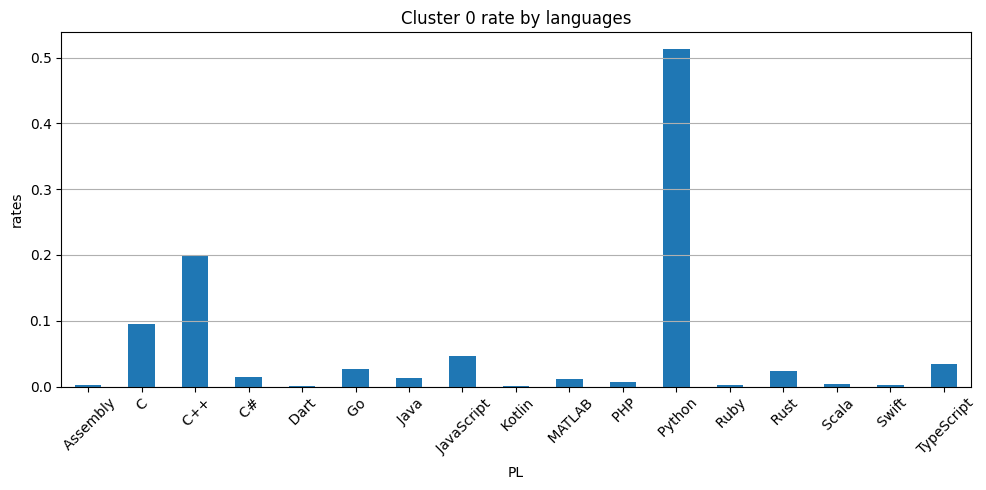

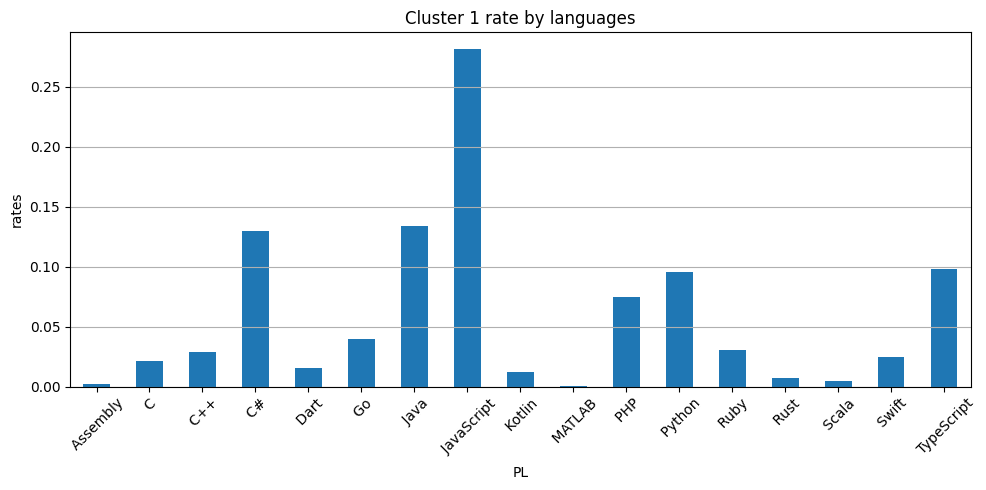

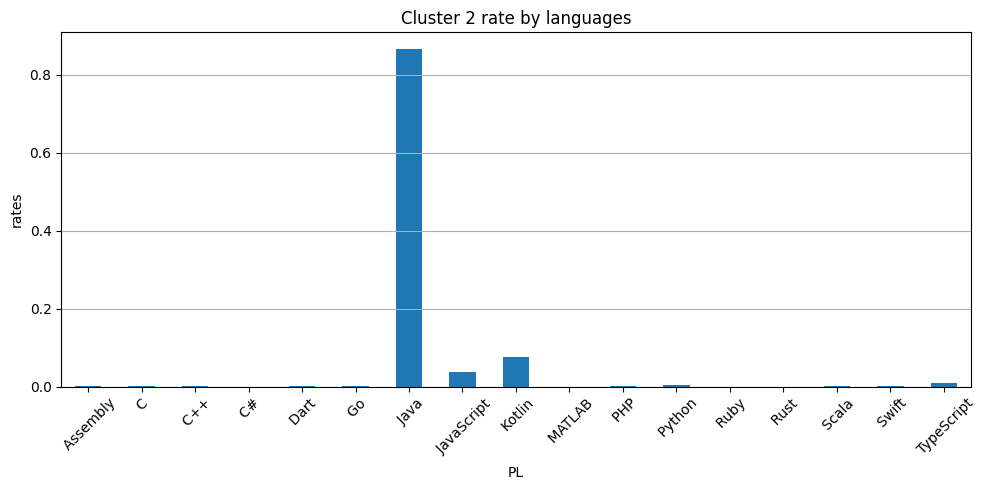

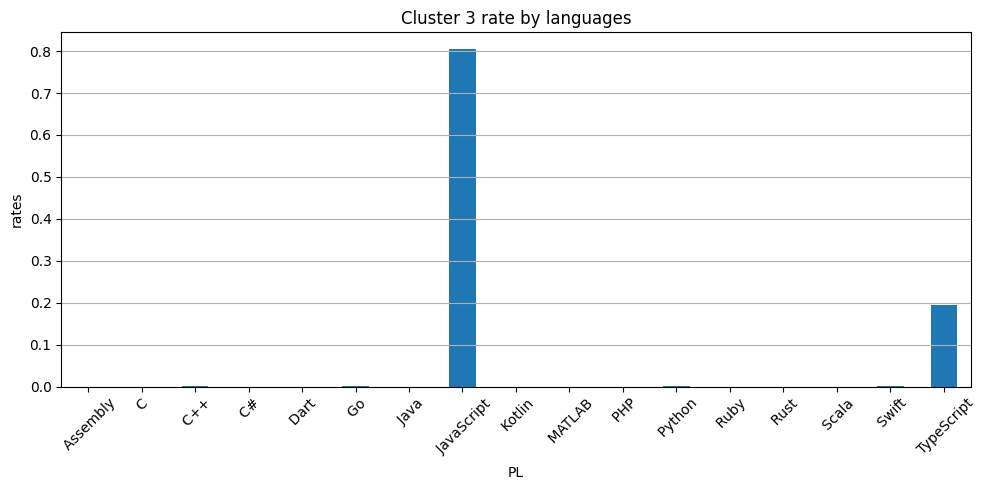

In [17]:
language_columns = df_combined.columns[1:-1]  # 'Ïú†Ï†Ä', 'ID', ..., 'cluster' Ï†úÏô∏

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú® Í≥ÑÏÇ∞
cluster_profiles = df_combined.groupby('cluster')[language_columns].mean()

# ÏãúÍ∞ÅÌôî: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú®
for cluster_id in cluster_profiles.index:
    plt.figure(figsize=(10, 5))
    cluster_profiles.loc[cluster_id].plot(kind='bar')
    plt.title(f"Cluster {cluster_id} rate by languages")
    plt.ylabel("rates")
    plt.xlabel("PL")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [22]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
probs = gmm.predict_proba(X_pca)  # ÎòêÎäî GMMÏóê ÏÇ¨Ïö©Ìïú ÏûÖÎ†• (X_scaled Îì±)
# Î™á Î™Ö ÎΩëÏùÑÏßÄ ÏÑ§Ï†ï
top_n = 5

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ top_n ÏÇ¨Ïö©Ïûê ID Ï∂úÎ†•
for cluster_id in range(gmm.n_components):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú ÏÜåÏÜç ÌôïÎ•† Î≤°ÌÑ∞
    cluster_probs = probs[:, cluster_id]

    # ÌôïÎ•† ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ïÎ†¨
    top_indices = np.argsort(cluster_probs)[::-1][:top_n]

    print(f"\nüîπ Cluster {cluster_id} ÏÉÅÏúÑ {top_n} ÎåÄÌëúÏûê:")
    for rank, idx in enumerate(top_indices, 1):
        user_id = df_combined.iloc[idx]['Ïú†Ï†Ä ID']
        prob = cluster_probs[idx]
        print(f"  {rank}. ID: {user_id} (ÌôïÎ•†: {prob:.4f})")



üîπ Cluster 0 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: mxxo (ÌôïÎ•†: 0.9998)
  2. ID: mxxo (ÌôïÎ•†: 0.9998)
  3. ID: kali-muon (ÌôïÎ•†: 0.9998)
  4. ID: kali-muon (ÌôïÎ•†: 0.9998)
  5. ID: nidhi-desai (ÌôïÎ•†: 0.9998)

üîπ Cluster 1 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: chrisrochford (ÌôïÎ•†: 1.0000)
  2. ID: chrisrochford (ÌôïÎ•†: 1.0000)
  3. ID: Ankhana (ÌôïÎ•†: 1.0000)
  4. ID: Ankhana (ÌôïÎ•†: 1.0000)
  5. ID: xiaodekaixin (ÌôïÎ•†: 1.0000)

üîπ Cluster 2 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: shivayogih (ÌôïÎ•†: 0.9996)
  2. ID: mendeleev23 (ÌôïÎ•†: 0.9996)
  3. ID: shivayogih (ÌôïÎ•†: 0.9996)
  4. ID: mendeleev23 (ÌôïÎ•†: 0.9996)
  5. ID: max-zhilin (ÌôïÎ•†: 0.9996)

üîπ Cluster 3 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: katieburak (ÌôïÎ•†: 0.9997)
  2. ID: AkshantUjjwal (ÌôïÎ•†: 0.9997)
  3. ID: KaueFernandes01 (ÌôïÎ•†: 0.9997)
  4. ID: Refagi (ÌôïÎ•†: 0.9997)
  5. ID: AbhinavaSanthosh (ÌôïÎ•†: 0.9997)


# 3. Solution: Do not use PCA

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 1. StandardScalerÎ°ú Ï†ïÍ∑úÌôîÎêú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
X_input = X_scaled  # PCA ÏÇ¨Ïö© X

# 2. GMM ÌïôÏäµ
gmm_pure = GaussianMixture(n_components=4, random_state=42)
gmm_pure.fit(X_input)
labels = gmm_pure.predict(X_input)

# 3. ÌèâÍ∞Ä
sil_score_pure = silhouette_score(X_input, labels)
print("Silhouette score without PCA:", sil_score_pure)
# Dunn Index Ìï®Ïàò Ï†ïÏùò
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    distances = pairwise_distances(X)

    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            inter_dist = np.min(pairwise_distances(cluster_i, cluster_j))
            inter_cluster_distances.append(inter_dist)

    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        intra_dist = np.max(pairwise_distances(cluster_i))
        intra_cluster_distances.append(intra_dist)

    min_inter = np.min(inter_cluster_distances)
    max_intra = np.max(intra_cluster_distances)

    return min_inter / max_intra

# Dunn Index Í≥ÑÏÇ∞
dunn_pure = dunn_index(X_input, labels)
print('Dunn Index of GMM:', dunn_pure)

Silhouette score without PCA: 0.05215922187121185
Dunn Index of GMM: 0.004271119617973587


In [24]:
probs = gmm_pure.predict_proba(X_input)
probs[0]

array([1.44381070e-14, 3.05072964e-24, 9.99997829e-01, 2.17137145e-06])

In [26]:
# ÌïÑÏöîÏãú ÏÇ¨Ïö©. pcaÎ•º Ïù¥ÎØ∏ Ïã§ÌñâÌï¥Î≤ÑÎ†∏Îã§Î©¥ ÏÇ¨Ïö©Ìï† Í≤É. Í∏∞Ï°¥ cluster Ïª¨Îüº ÏÇ≠Ï†ú
df_combined.drop('cluster', axis=1, inplace=True)

In [27]:
df_combined['cluster'] = labels

# CSVÎ°ú Ï†ÄÏû•
df_combined.to_csv('/content/drive/MyDrive/Colab Notebooks/COSE471/test/final_profiles_with_clusters.csv', index=False)

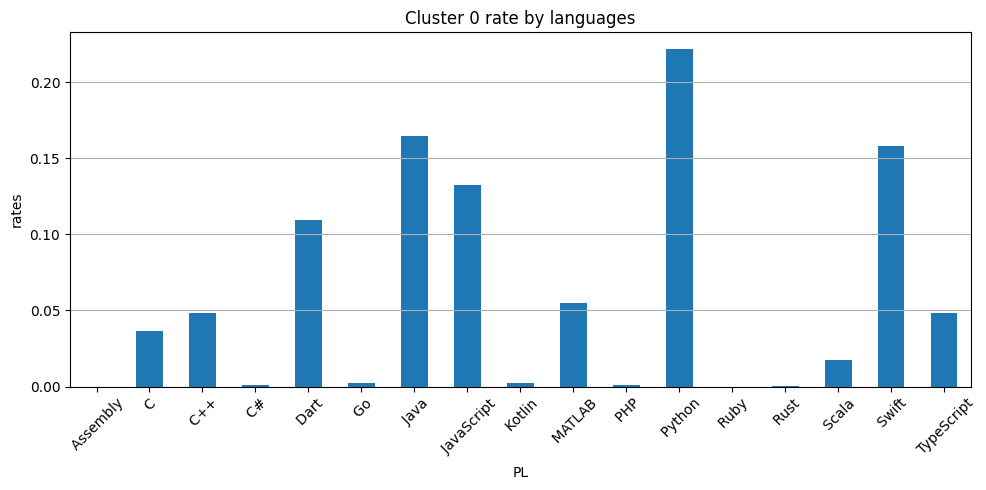

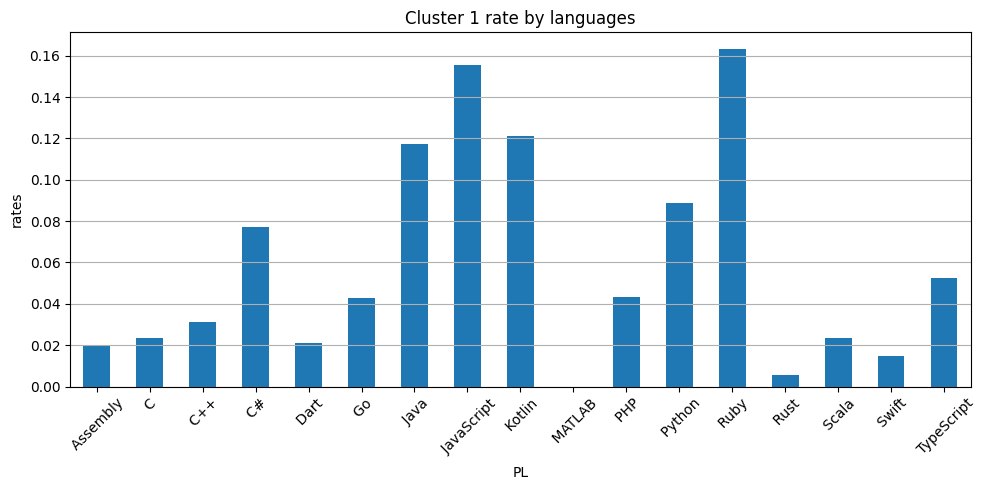

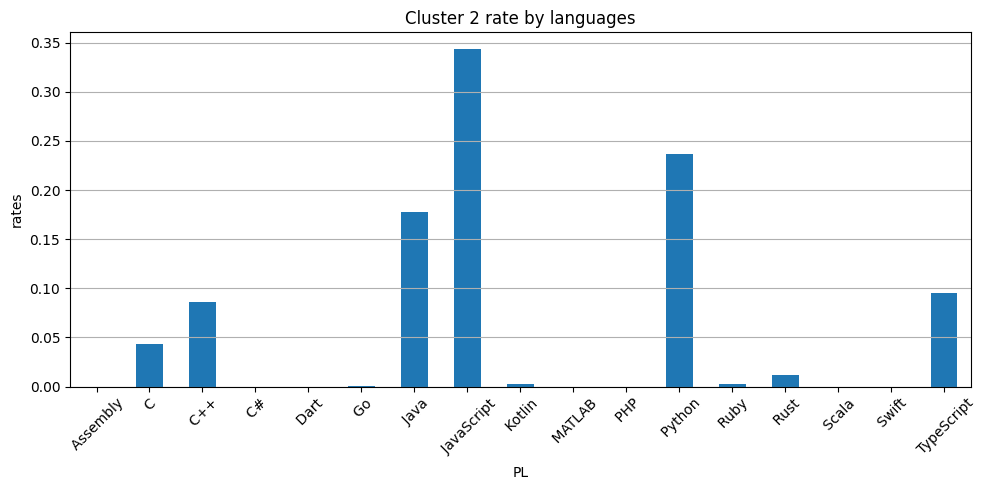

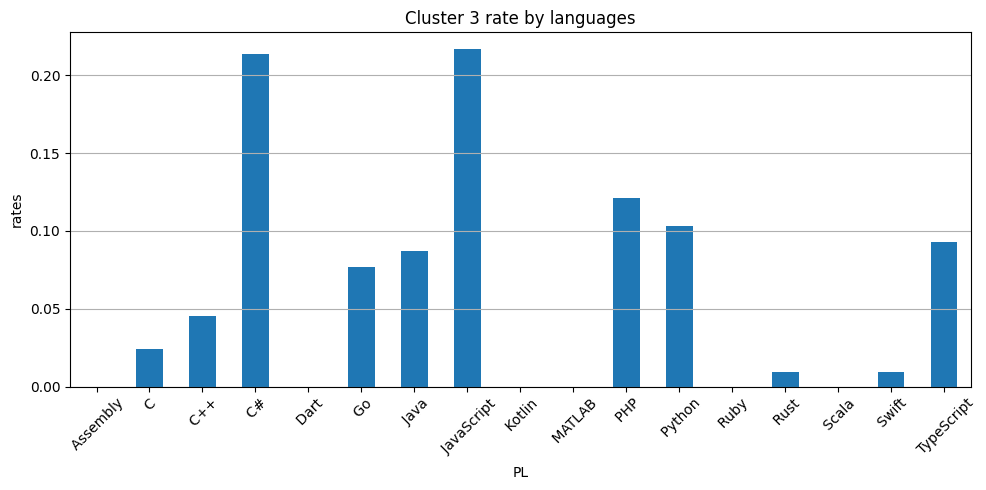

In [29]:
language_columns = df_combined.columns[1:-1]  # 'Ïú†Ï†Ä', 'ID', ..., 'cluster' Ï†úÏô∏

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú® Í≥ÑÏÇ∞
cluster_profiles = df_combined.groupby('cluster')[language_columns].mean()

# ÏãúÍ∞ÅÌôî: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú®
for cluster_id in cluster_profiles.index:
    plt.figure(figsize=(10, 5))
    cluster_profiles.loc[cluster_id].plot(kind='bar')
    plt.title(f"Cluster {cluster_id} rate by languages")
    plt.ylabel("rates")
    plt.xlabel("PL")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [30]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
probs = gmm_pure.predict_proba(X_input)  # ÎòêÎäî GMMÏóê ÏÇ¨Ïö©Ìïú ÏûÖÎ†• (X_scaled Îì±)
# Î™á Î™Ö ÎΩëÏùÑÏßÄ ÏÑ§Ï†ï
top_n = 5

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ top_n ÏÇ¨Ïö©Ïûê ID Ï∂úÎ†•
for cluster_id in range(gmm_pure.n_components):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú ÏÜåÏÜç ÌôïÎ•† Î≤°ÌÑ∞
    cluster_probs = probs[:, cluster_id]

    # ÌôïÎ•† ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ïÎ†¨
    top_indices = np.argsort(cluster_probs)[::-1][:top_n]

    print(f"\nüîπ Cluster {cluster_id} ÏÉÅÏúÑ {top_n} ÎåÄÌëúÏûê:")
    for rank, idx in enumerate(top_indices, 1):
        user_id = df_combined.iloc[idx]['Ïú†Ï†Ä ID']
        prob = cluster_probs[idx]
        print(f"  {rank}. ID: {user_id} (ÌôïÎ•†: {prob:.4f})")


üîπ Cluster 0 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: duyguozc (ÌôïÎ•†: 1.0000)
  2. ID: SakuniJayasinghe (ÌôïÎ•†: 1.0000)
  3. ID: Haileleul-K (ÌôïÎ•†: 1.0000)
  4. ID: minhthuc251 (ÌôïÎ•†: 1.0000)
  5. ID: andreiYarash (ÌôïÎ•†: 1.0000)

üîπ Cluster 1 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: whale1st (ÌôïÎ•†: 1.0000)
  2. ID: Ankhana (ÌôïÎ•†: 1.0000)
  3. ID: nee-vir (ÌôïÎ•†: 1.0000)
  4. ID: Ankhana (ÌôïÎ•†: 1.0000)
  5. ID: mendeleev23 (ÌôïÎ•†: 1.0000)

üîπ Cluster 2 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: llarruda (ÌôïÎ•†: 1.0000)
  2. ID: splainez (ÌôïÎ•†: 1.0000)
  3. ID: Piootrek (ÌôïÎ•†: 1.0000)
  4. ID: sefagurel (ÌôïÎ•†: 1.0000)
  5. ID: slarge (ÌôïÎ•†: 1.0000)

üîπ Cluster 3 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: caikuner (ÌôïÎ•†: 1.0000)
  2. ID: angelitocax (ÌôïÎ•†: 1.0000)
  3. ID: sajjad2274 (ÌôïÎ•†: 1.0000)
  4. ID: Strike2001 (ÌôïÎ•†: 1.0000)
  5. ID: zachreborn (ÌôïÎ•†: 1.0000)
